## MSE diagram analysis: overlaying curves for different times
ATM651 Introduction of atmospheric dynamics 
2019, Fall <br>
- activate your ATM651 environment to access required packages or simply type **"pip install siphon"**,**"pip install mseplots-pkg"** in the terminal to download them.<br>
<br>
- drag three cells below into your notebook for your own cases

In [1]:
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
from MSEplots import plots as mpt
from metpy.calc.thermo import *
from metpy.units import units

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2018, 8, 25, 0)
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
p = df['pressure'].values #hPa
T = df['temperature'].values  #C
Td = df['dewpoint'].values #C
Z = df['height'].values   #m

r = mixing_ratio( saturation_vapor_pressure(Td*units('degC')), p*units('hPa') ) 
q = specific_humidity_from_mixing_ratio(r).magnitude
rs = mixing_ratio( saturation_vapor_pressure(T*units('degC')), p*units('hPa') ) 
qs = specific_humidity_from_mixing_ratio(rs).magnitude

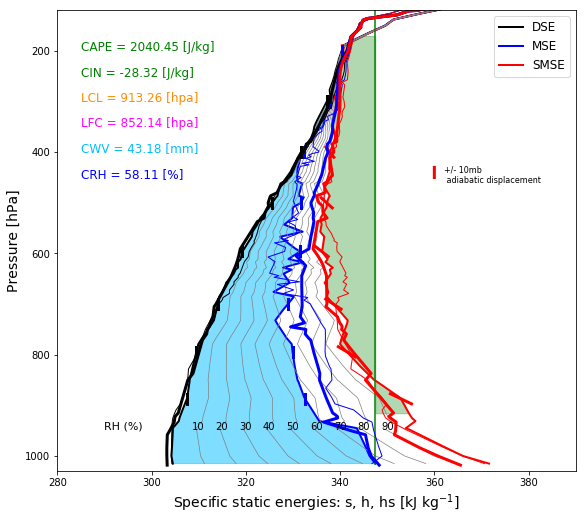

In [6]:
ax = mpt.msed_plots(p, T ,q , Z, entrain=False)

# add curves for different times. For example, 8/24 and 8/26 
mpt.add_curves_Wyoming(ax,datetime(2013,8,24,0),'MFL',linewidth=1.0)
mpt.add_curves_Wyoming(ax,datetime(2013,8,26,0),'MFL',linewidth=3.0)